[ 50  25  20 -10  20]
    4     3     2
10 x + 5 x + 4 x - 2 x + 4
    3
10 x + 5
     7      6      5      4      3      2
100 x + 50 x + 40 x + 30 x + 65 x + 20 x - 10 x + 20


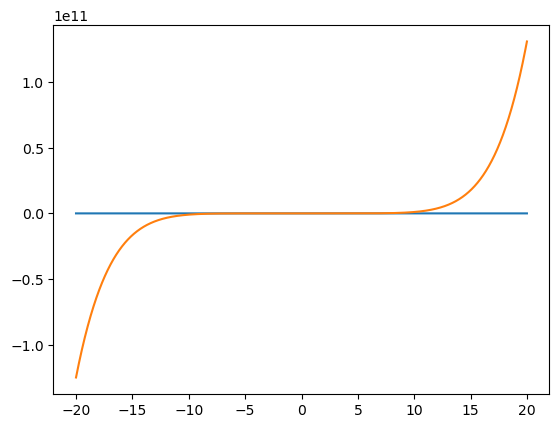

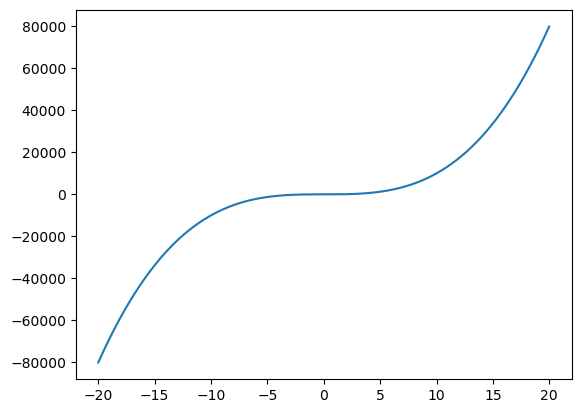

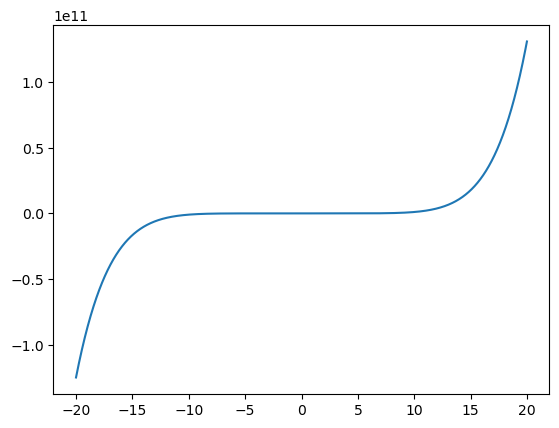

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-20, 20, 0.01)
y = 10*x**4 + 5*x**3 + 4*x**2 - 2*x + 4
z = 10*x**3 + 5
w = y * z

p_a = [10, 5, 4, -2, 4]
p_b = [5, 0, 0, 10]
manualConv = np.multiply(p_a , [5])
print(manualConv)


conv = 100*x**7 + 50*x**6 + 40*x**5 + 30*x**4 + 65*x**3 +20*x**2 -10*x + 20
p1 = np.poly1d([10,5,4,-2,4])
p2 = np.poly1d([10,0,0,5])
p3 = np.polymul(p1, p2)
print(p1)
print(p2)
print(p3)

plt.figure(1)
plt.plot(x,y)
plt.plot(x,w)

plt.figure(2)
plt.plot(x,z)
# plt.legend(["z", "conv"], loc="lower right")

plt.figure(3)
plt.plot(x,conv)


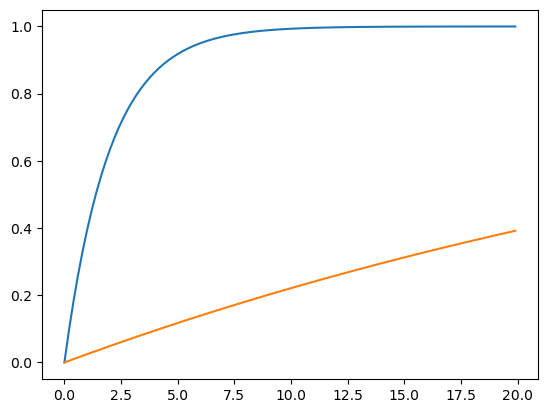

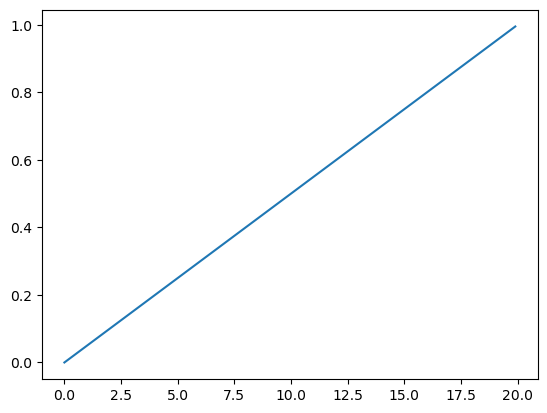

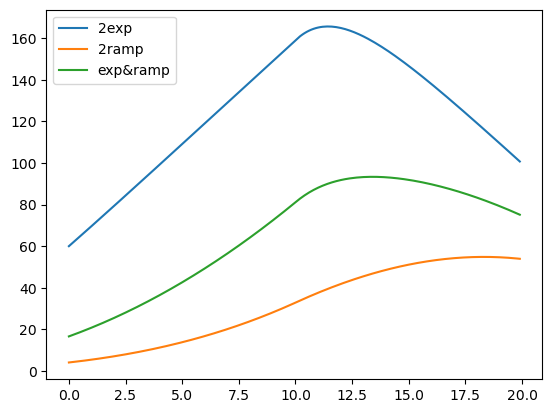

In [3]:
x=np.arange(0, 20, 0.1)

y = 1 - np.exp(-x/2) #exponential growing func

y1 =  0.05*x #ramping func

z = 1 - np.exp(-y1/2) #the ramping function is an input of exponential growing function

# w = np.convolve(y, y1)
w = np.convolve(y, y, mode="same") #convolution ramping and exponential functions
w1 = np.convolve(y1, y1, mode="same") #convolution ramping and exponential functions
w2 = np.convolve(y, y1, mode="same") #convolution ramping and exponential functions
# w1 = np.polyval(y, x)
# x1 = np.linspace(0,20,200)
# w1 = [np.polyval(w, i) for i in x1]


plt.plot(x,y)
plt.plot(x,z)
plt.figure()
plt.plot(x,y1)
plt.figure()
plt.plot(x,w)
plt.plot(x,w1)
plt.plot(x,w2)
plt.legend(["2exp", "2ramp", "exp&ramp"])

# $1^{st}$ Order System: Unit Impulse Response
$$c(t) = \frac{1}{T}e^{(-\frac{t}{T})}u(t) \tag{1}$$

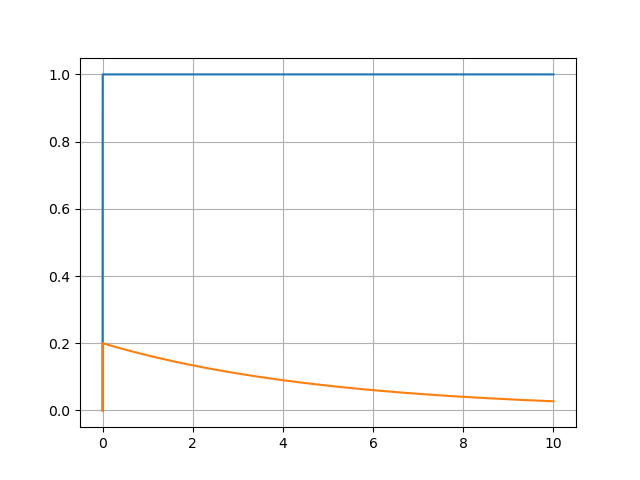

In [4]:

Ts = 0.001 #sample time
t = np.arange(0, 10, Ts)#time vector

#create a step function
u = []
i = 0
while( i < 9.999 ):
    i += Ts
    if( i >= 0.002 ):
        u.append(1)
    else:
        u.append(0)
#####end of step function#####        

T = 5 #Time constant
c = 1/T * np.exp(-(t)/T) * u #The unit impulse response

#print table representation of impulse response function into the file
import csv
import pandas as pd


with open('impulse_response.csv', 'w') as impResFile:
    fieldnames = ['c(t)']
    writer = csv.DictWriter(impResFile, fieldnames=fieldnames)
    writer.writeheader()
    # writer.writerow({"c(t)": "test", "t": "time"})
    for c_ids in c:
        writer.writerow({"c(t)": c_ids})

#append time to the csv file using Pandas
csvFiletoAppend = "impulse_response.csv"
df = pd.read_csv(csvFiletoAppend)
df['t'] = t
df.to_csv(csvFiletoAppend, index=False)


#chart plotting
%matplotlib widget
plt.figure()
plt.grid()
plt.plot(t,u)
# plt.figure()
plt.plot(t,c)




# $1^{st}$ Order Tranfer Function: Unit Step Response
$$c(t) = (1 - e^{-\frac{t}{T}})u(t) \tag{2}$$

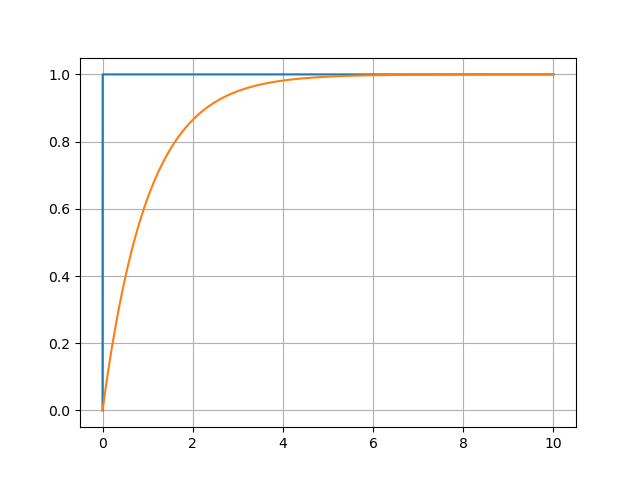

In [5]:
T1 = 1
Cstep = (1 - np.exp((-1)*(t/T1)))*u

plt.figure()
plt.grid()
plt.plot(t, u)
plt.plot(t, Cstep)

## <span style="color:#FF0303">TODO:</span>

- conduct a convolution of impulse response with step response functions